In [59]:
import pandas as pd
import networkx as nx
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from tqdm import tqdm

In [3]:
tqdm.pandas()

C:\Users\Franco\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [39]:
!pip install networkx

## Read file with edges

In [3]:
df=pd.read_csv('wikigraph_reduced.csv',sep='\t',index_col=0,names=['Source','Target'],header=0)

In [5]:
df.head()

,Source,Target
796,95,1185516
909,108,1059989
910,108,1062426
911,108,1161925
1141,134,541222


In [6]:
df.shape

(483094, 2)

In [7]:
df.reset_index(drop=True,inplace=True)

In [8]:
df.head()

,Source,Target
0,95,1185516
1,108,1059989
2,108,1062426
3,108,1161925
4,134,541222


In [32]:
df.nunique()

Source    90920
Target    75467
dtype: int64

In [37]:
tot_article = pd.concat([df.Source, df.Target]).nunique()
tot_article

98343

In [46]:
len(df.drop_duplicates())

483094

## Read file with Categories

In [6]:
df_category = pd.read_csv("wiki-topcats-categories.txt",sep=';',names=['Category','Articles'],header=0)

In [12]:
df_category['Category']=df_category.Category.apply(lambda x: x.split(':')[1])

In [15]:
df_category['Articles']=df_category.Articles.apply(lambda x : list(map(int,x.split())))

In [16]:
df_category

,Category,Articles
0,People_from_Worcester,"[1056, 1057, 1058, 1059, 1060, 60971, 76515, 7..."
1,Skin_conditions_resulting_from_physical_factors,"[971, 973, 1166, 1167, 1168, 1169, 1170, 1171,..."
2,Visual_kei_bands,"[1297, 1300, 1311, 1312, 1313, 1314, 1315, 131..."
3,Japanese_rock_music_groups,"[1297, 1300, 1313, 1314, 1315, 1316, 1319, 132..."
4,Laboulbeniomycetes,"[1941, 1942, 1943, 1944, 1945, 1947, 1948, 194..."
...,...,...
17358,British_science_fiction_novels,"[16110, 24545, 39814, 67923, 108629, 108630, 1..."
17359,Television_soundtracks,"[1117, 110192, 110376, 110377, 110380, 110395,..."
17360,Diptera_of_North_America,"[279, 280, 283, 31110, 31129, 31133, 31138, 31..."
17361,Diptera_of_Asia,"[279, 31129, 31133, 31134, 31135, 31136, 31137..."


In [17]:
pd.DataFrame(data = {'Articles': [1, 2], 'Category': 'People_from_Worcester'})

,Articles,Category
0,1,People_from_Worcester
1,2,People_from_Worcester


In [22]:
df_article = pd.concat([pd.DataFrame(data = {'Articles': df_category.loc[i].Articles, 
                                             'Category': df_category.loc[i].Category}) for i in df_category.index], 
                       ignore_index=True)

In [84]:
df_article

(4758983, 2)

In [85]:
with open("./data/wiki-articles-category.csv", "w") as f:
        f.write(df_article.to_csv(index=False))

In [27]:
rand_article = df_article.groupby('Articles').Category.sample(1)

In [31]:
pd.DataFrame(data={'Articles': rand_article.index,'Category': rand_article.values})

,Articles,Category
0,19996,Diseases_of_the_eye_and_adnexa
1,1872056,Democracy
2,1667248,Personal_identification_documents
3,3150342,Group_theory
4,3152494,Algebraic_geometry
...,...,...
1790942,1058694,Connecticut_colonial_people
1790943,2409781,Medicinal_plants
1790944,196380,The_Football_League_players
1790945,3263348,Extinct_baronies


## Read file with page names

In [8]:
df_names = pd.read_csv("wiki-topcats-page-names.txt",header=None,names=['names'])

In [9]:
df_names

,names
0,0 Chiasmal syndrome
1,1 Kleroterion
2,2 Pinakion
3,3 LyndonHochschildSerre spectral sequence
4,4 Zariski's main theorem
...,...
1791484,1791484 Noadiah Russell (Yale founder)
1791485,1791485 Cornus officinalis
1791486,1791486 Peter Grummitt
1791487,1791487 Baron Estcourt


In [109]:
#varianti
#df_names['article']=df_names.names.apply(lambda x :x.split()[0])
#df_names[['article','name']]=df_names['names'].str.split(' ',1,expand=True)

In [10]:
df_names['names']=df_names.names.apply(lambda x :x.split(' ',1)[1])

In [11]:
df_names.head()

,names
0,Chiasmal syndrome
1,Kleroterion
2,Pinakion
3,LyndonHochschildSerre spectral sequence
4,Zariski's main theorem


In [20]:
df_names.shape

(1791489, 1)

In [47]:
G = nx.DiGraph()

In [ ]:
G.add_edges_from(df.values)
G.edges()

In [49]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 98343\nNumber of edges: 483094\nAverage in degree:   4.9123\nAverage out degree:   4.9123'

In [54]:
density = G.number_of_edges()/(G.number_of_nodes()*(G.number_of_nodes()-1))

In [55]:
density

4.9951571365597335e-05

In [56]:
G.number_of_edges()

483094

In [57]:
G.number_of_nodes()

98343

In [58]:
G.number_of_edges()/G.number_of_nodes()

4.912337431235573

In [61]:
out_degrees = df.groupby('Source').size()
in_degrees = df.groupby('Target').size()

In [62]:
degrees

Source
95         1
108        3
134        4
153        9
167        2
          ..
1790624    2
1790638    1
1791481    5
1791482    1
1791484    1
Length: 90920, dtype: int64

In [81]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.figure(figsize=(16,9))
    plt.title('Degree Distribution', size=22)
    plt.ylabel('Prob.', size=18)
    plt.xlabel('Degree', size=18)
    plt.hist(degrees, 100, log=True, density=True)
    plt.show()

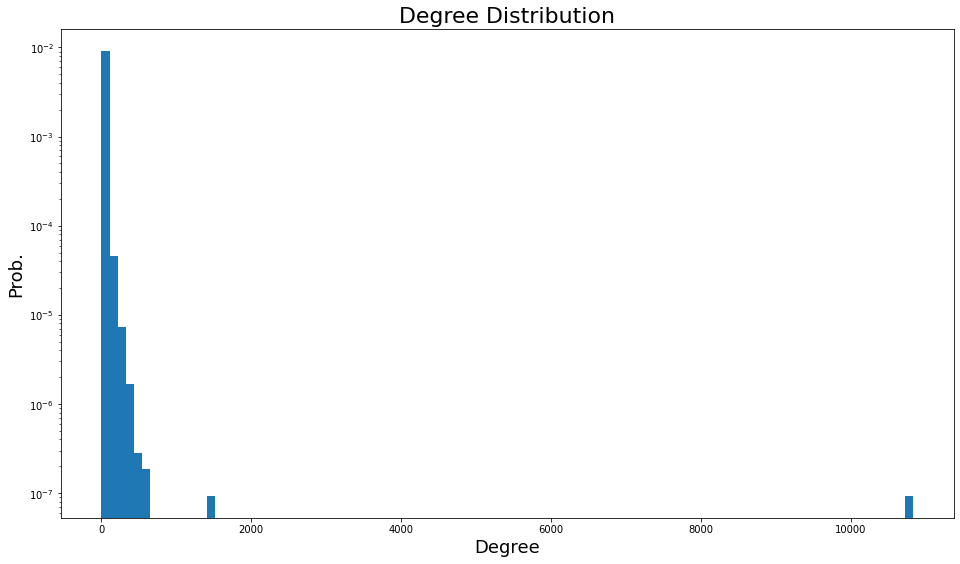

In [82]:
plot_degree_dist(G)